## BASIC FINANCIAL STATEMENTS ANALYSIS FOR TESLA

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Import Excel Documents & Format Data:

In [2]:
# Import excel documents
balance_sheet = pd.read_excel('balance_sheet.xlsx')
income_statement = pd.read_excel('income_statement.xlsx')
cashflow_statement = pd.read_excel('cashflow_statement.xlsx')

# Format data to make the index the line item names
balance_sheet.set_index('in million USD', inplace=True)
income_statement.set_index('in million USD', inplace=True)
cashflow_statement.set_index('in million USD', inplace=True)

# Replace N/A values with 0
balance_sheet.fillna(0, inplace=True)
income_statement.fillna(0, inplace=True)
cashflow_statement.fillna(0, inplace=True)

# Transpose data for visualization
balance_sheet = balance_sheet.T
income_statement = income_statement.T
cashflow_statement = cashflow_statement.T

### Financial Ratio Analysis:

In [3]:
# Financial Ratios
effective_tax_rate = income_statement["Income Tax (Expense) Benefit, net"] / income_statement["Pretax Income (Loss)"]

working_capital = ( balance_sheet["Total Current Assets"] - balance_sheet["Total Current Liabilities"] ) * 100
current_ratio = ( balance_sheet["Total Current Assets"] / balance_sheet["Total Current Liabilities"] ) 
quick_ratio = ( balance_sheet["Total Current Assets"] - balance_sheet["Inventories"] ) / balance_sheet["Total Current Liabilities"]
asset_turnover = income_statement["Revenue"] / balance_sheet["Total Assets"]
debt_equity = balance_sheet["Total Liabilities"] / balance_sheet["Total Equity"]
debt_asset = balance_sheet["Total Liabilities"] / balance_sheet["Total Assets"]
ROE = ( income_statement["Income (Loss) Including Minority Interest"] / balance_sheet["Total Equity"] ) * 100
ROIC = ( ( income_statement["Income (Loss) Including Minority Interest"] * (1 - effective_tax_rate) ) / (balance_sheet["Total Liabilities & Equity"] - balance_sheet["Cash, Cash Equivalents & Short Term Investments"]) ) * 100
ROCE = ( income_statement["Income (Loss) Including Minority Interest"] / balance_sheet["Total Assets"] ) * 100

gross_profit_margin = ( income_statement["Gross Profit"] / income_statement['Revenue'] ) * 100
operating_profit_margin = ( income_statement["Operating Income (Loss)"] / income_statement["Revenue"] ) * 100

DSO = balance_sheet["Accounts & Notes Receivable"] / (income_statement["Revenue"]/ 365)
DIOH = balance_sheet["Inventories"] / (income_statement["Cost of revenue"] / 365)
DPO = balance_sheet["Payables & Accruals"] / (income_statement["Cost of revenue"] / 365)

cl_coverage = ( cashflow_statement["Cash from Operating Activities"] / balance_sheet["Total Current Liabilities"] ) * 100
cashflow_margin = ( cashflow_statement["Cash from Operating Activities"] / income_statement["Revenue"] ) * 100
cashflow_coverage = ( cashflow_statement["Cash from Operating Activities"] / balance_sheet["Total Liabilities"] ) * 100

# Create a dataframe with the financial ratio data
financial_ratio = pd.DataFrame()

financial_ratio["Working Capital"] = working_capital
financial_ratio["Current Ratio"] = current_ratio
financial_ratio["Quick Ratio"] = quick_ratio
financial_ratio["Asset Turnover Rate"] = asset_turnover
financial_ratio["Debt to Equity Ratio"] = debt_equity
financial_ratio["Debt to Total Assets Ratio"] = debt_asset
financial_ratio["Return on Equity"] = ROE
financial_ratio["Return on Invested Capital"] = ROIC
financial_ratio["Return on Capital Employed"] = ROCE
financial_ratio["Gross Profit Margin Ratio"] = gross_profit_margin
financial_ratio["Operating Profit Margin Ratio"] = operating_profit_margin
financial_ratio["Days Sales Outstanding"] = DSO
financial_ratio["Days Inventory on Hand"] = DIOH
financial_ratio["Days Payables Outstanding"] = DPO 
financial_ratio["Current Liability Coverage Ratio"] = cl_coverage
financial_ratio["Cash Flow Margin Ratio"] = cashflow_margin
financial_ratio["Cash Flow Coverage Ratio"] = cashflow_coverage

# Print statement for financial ratios
print("="*124)
print("FINANCIAL RATIOS OUTPUT SUMMARY:")
print("-"*124)
print("WORKING CAPITAL: The average working capital in 2020 was ${:.1f} million USD. In 2019, the average working capital was ${:.1f} million USD. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Working Capital"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Working Capital"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Working Capital"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Working Capital"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Working Capital"].iloc[8:12]) / 4 )))
print() # space
print("CURRENT RATIO: The average current ratio in 2020 was {:.2f}. In 2019, the average current ratio was {:.2f}. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Current Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Current Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Current Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Current Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Current Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space
print("QUICK RATIO: The average quick ratio in 2020 was {:.2f}. In 2019, the average quick ratio was {:.2f}. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Quick Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Quick Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Quick Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Quick Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Quick Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space
print("ASSET TURNOVER RATE: The average asset turnover rate in 2020 was {:.2f}. In 2019, the average asset turnover rate was {:.2f}. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Asset Turnover Rate"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Asset Turnover Rate"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Asset Turnover Rate"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Asset Turnover Rate"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Asset Turnover Rate"].iloc[8:12]) / 4 ) * 100))
print() # space
print("DEBT TO EQUITY RATIO: The average debt to equity ratio in 2020 was {:.2f}. In 2019, the average debt to equity ratio was {:.2f}. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Debt to Equity Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Debt to Equity Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Debt to Equity Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Debt to Equity Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Debt to Equity Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space
print("DEBT TO ASSET RATIO: The average debt to asset ratio in 2020 was {:.2f}. In 2019, the average debt to asset ratio was {:.2f}. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Debt to Total Assets Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Debt to Total Assets Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Debt to Total Assets Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Debt to Total Assets Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Debt to Total Assets Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space
print("RETURN ON EQUITY: The average return equity ratio in 2020 was {:.2f}. In 2019, the average return to equity ratio was {:.2f}. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Return on Equity"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Return on Equity"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Return on Equity"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Return on Equity"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Return on Equity"].iloc[8:12]) / 4 ) * 100))
print() # space
print("RETURN ON INVESTED CAPITAL: The average return on invested capital ratio in 2020 was {:.2f}. In 2019, the average return on invested capital ratio was {:.2f}. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Return on Invested Capital"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Return on Invested Capital"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Return on Invested Capital"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Return on Invested Capital"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Return on Invested Capital"].iloc[8:12]) / 4 ) * 100))
print() # space
print("RETURN ON CAPITAL EMPLOYED: The average return on capital employed ratio in 2020 was {:.2f}. In 2019, the average return on capital employed ratio was {:.2f}. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Return on Capital Employed"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Return on Capital Employed"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Return on Capital Employed"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Return on Capital Employed"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Return on Capital Employed"].iloc[8:12]) / 4 ) * 100))
print() # space
print("GROSS PROFIT MARGIN RATIO: The average gross profit margin ratio in 2020 was {:.2f}%. In 2019, the average gross profit margin ratio was {:.2f}%. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Gross Profit Margin Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Gross Profit Margin Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Gross Profit Margin Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Gross Profit Margin Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Gross Profit Margin Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space 
print("OPERATING PROFIT MARGIN RATIO: The average operating profit margin ratio in 2020 was {:.2f}%. In 2019, the average operating profit margin was {:.2f}%. This is a {:.2f}% decrease from the previous year.".format(( np.sum(financial_ratio["Operating Profit Margin Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Operating Profit Margin Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Operating Profit Margin Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Operating Profit Margin Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Operating Profit Margin Ratio"].iloc[8:12]) / 4 ) * 100)) 
print() # space
print("DAYS SALES OUTSTANDING: The average number of days sales were outstanding in 2020 was {:.2f} days. In 2019, the number of days sales were outstanding was {:.2f} days. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Days Sales Outstanding"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Days Sales Outstanding"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Days Sales Outstanding"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Days Sales Outstanding"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Days Sales Outstanding"].iloc[8:12]) / 4 ) * 100))
print() # space
print("DAYS INVENTORY ON HAND: The average number of days inventory were on hand in 2020 was {:.2f} days. In 2019, the number of days inventory were on hand was {:.2f} days. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Days Inventory on Hand"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Days Inventory on Hand"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Days Inventory on Hand"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Days Inventory on Hand"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Days Inventory on Hand"].iloc[8:12]) / 4 ) * 100))
print() # space
print("DAYS PAYABLES OUTSTANDING: The average number of days payables were outstanding in 2020 was {:.2f} days. In 2019, the number of days payables were outstanding was {:.2f} days. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Days Payables Outstanding"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Days Payables Outstanding"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Days Payables Outstanding"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Days Payables Outstanding"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Days Payables Outstanding"].iloc[8:12]) / 4 ) * 100))
print() # space
print("CURRENT LIABILITY COVERAGE RATIO: The average current liability coverage ratio in 2020 was {:.2f}%. In 2019, the average current liability coverage ratio was {:.2f}%. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Current Liability Coverage Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Current Liability Coverage Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Current Liability Coverage Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Current Liability Coverage Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Current Liability Coverage Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space
print("CASH FLOW MARGIN RATIO: The average cash flow margin ratio in 2020 was {:.2f}%. In 2019, the average cash flow margin ratio was {:.2f}%. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Cash Flow Margin Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Cash Flow Margin Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Cash Flow Margin Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Cash Flow Margin Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Cash Flow Margin Ratio"].iloc[8:12]) / 4 ) * 100))
print() # space
print("CASH FLOW COVERAGE RATIO: The average cash flow coverage ratio in 2020 was {:.2f}%. In 2019, the average cash flow coverage ratio was {:.2f}%. This is a {:.2f}% increase from the previous year.".format(( np.sum(financial_ratio["Cash Flow Coverage Ratio"].iloc[12:16]) / 4 ), ( np.sum(financial_ratio["Cash Flow Coverage Ratio"].iloc[8:12]) / 4 ), ( ( np.sum(financial_ratio["Cash Flow Coverage Ratio"].iloc[12:16]) / 4 ) - ( np.sum(financial_ratio["Cash Flow Coverage Ratio"].iloc[8:12]) / 4 ) ) / ( np.sum(financial_ratio["Cash Flow Coverage Ratio"].iloc[8:12]) / 4 ) * 100))
print("-"*124)

FINANCIAL RATIOS OUTPUT SUMMARY:
----------------------------------------------------------------------------------------------------------------------------
WORKING CAPITAL: The average working capital in 2020 was $672100.0 million USD. In 2019, the average working capital was $31455.0 million USD. This is a 20.37% increase from the previous year.

CURRENT RATIO: The average current ratio in 2020 was 1.50. In 2019, the average current ratio was 1.03. This is a 46.20% increase from the previous year.

QUICK RATIO: The average quick ratio in 2020 was 1.17. In 2019, the average quick ratio was 0.66. This is a 77.06% increase from the previous year.

ASSET TURNOVER RATE: The average asset turnover rate in 2020 was 0.18. In 2019, the average asset turnover rate was 0.19. This is a -6.12% decrease from the previous year.

DEBT TO EQUITY RATIO: The average debt to equity ratio in 2020 was 1.92. In 2019, the average debt to equity ratio was 3.59. This is a -46.60% decrease from the previous y

## Visualizing Financial Statements Relationships:

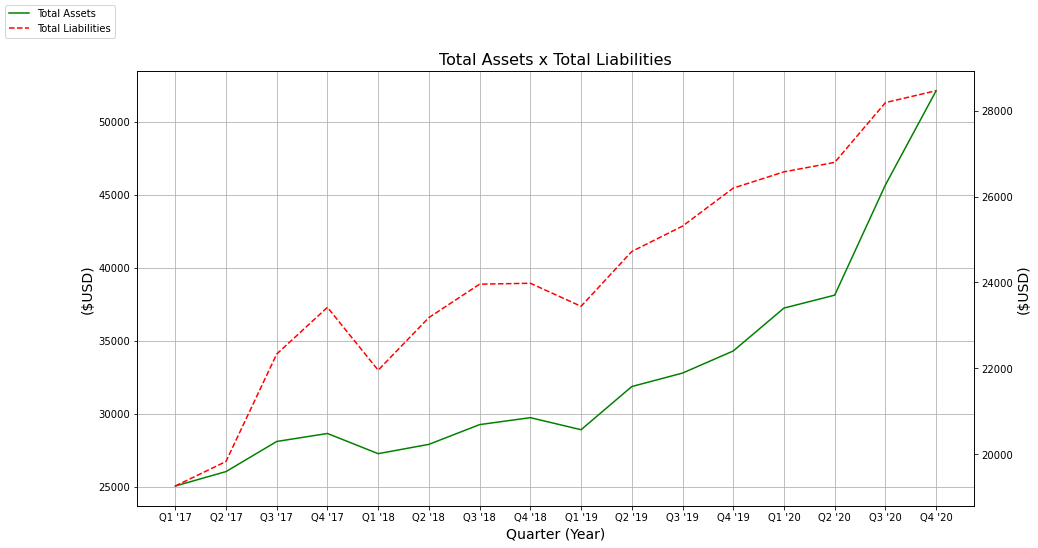

In [4]:
# Plotting total assets against total liabilities 
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(balance_sheet.index.values, balance_sheet["Total Assets"], color="g", label="Total Assets")

ax2 = ax.twinx()
ax2.plot(balance_sheet.index.values, balance_sheet["Total Liabilities"], color="r", linestyle= "--", label="Total Liabilities")

# Format the plot
plt.title("Total Assets x Total Liabilities", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("($USD)", fontsize=14)
ax2.set_ylabel("($USD)", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

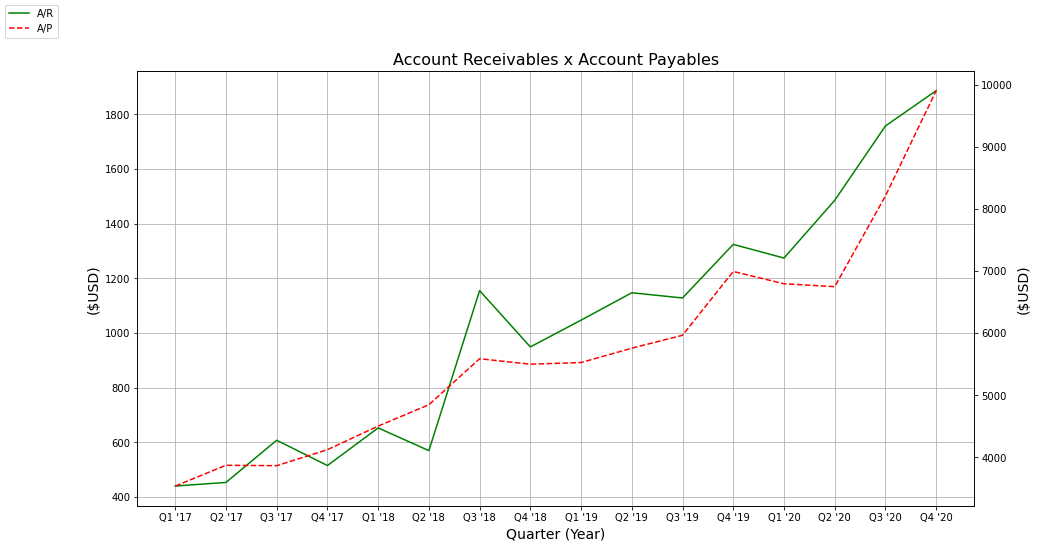

In [5]:
# Plotting account receivables against account payables
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(balance_sheet.index.values, balance_sheet["Accounts & Notes Receivable"], color="g", label="A/R")

ax2 = ax.twinx()
ax2.plot(balance_sheet.index.values, balance_sheet["Payables & Accruals"], color="r", linestyle="--", label="A/P")

# Format the plot
plt.title("Account Receivables x Account Payables", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("($USD)", fontsize=14)
ax2.set_ylabel("($USD)", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

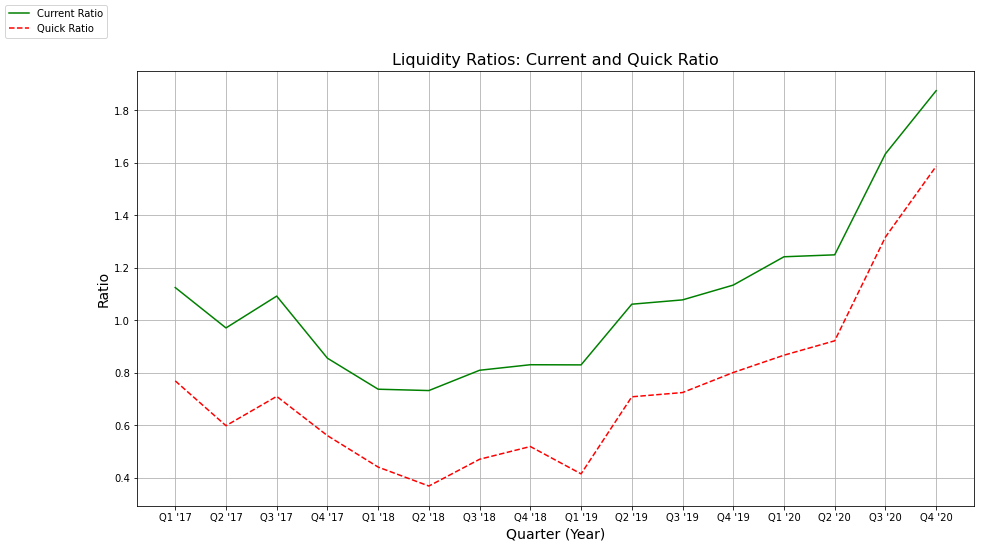

In [6]:
# Plotting liquidity ratios
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, financial_ratio["Current Ratio"], color="g", label="Current Ratio")
ax.plot(financial_ratio.index.values, financial_ratio["Quick Ratio"], color="r", linestyle="--", label="Quick Ratio")

# Format the plot
plt.title("Liquidity Ratios: Current and Quick Ratio", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Ratio", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

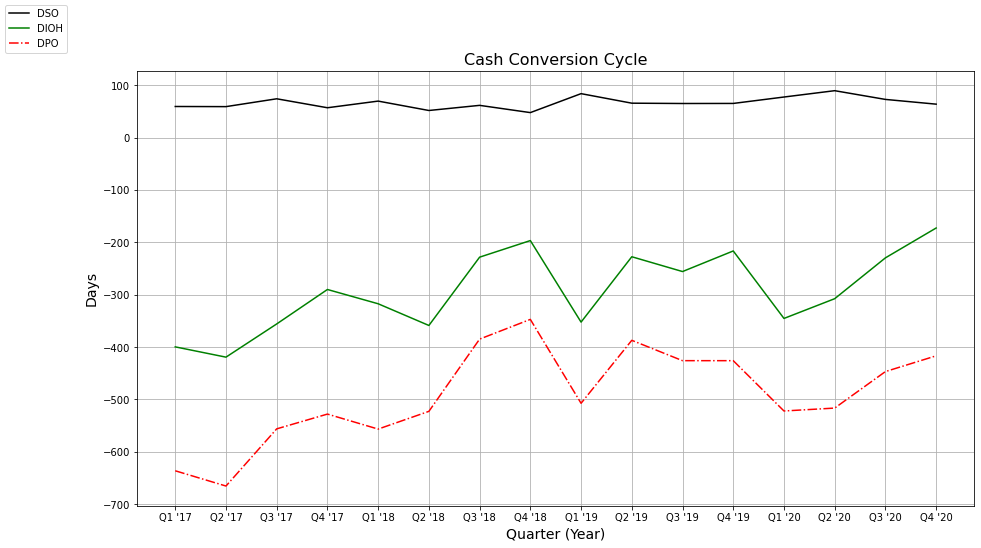

In [7]:
# Plotting the cash conversion cycle
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, financial_ratio["Days Sales Outstanding"],color="k", label="DSO")
ax.plot(financial_ratio.index.values, financial_ratio["Days Inventory on Hand"], color="g", label="DIOH")
ax.plot(financial_ratio.index.values, financial_ratio["Days Payables Outstanding"],color="r", linestyle ="-.", label="DPO")

# Format the plot
plt.title("Cash Conversion Cycle", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Days", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

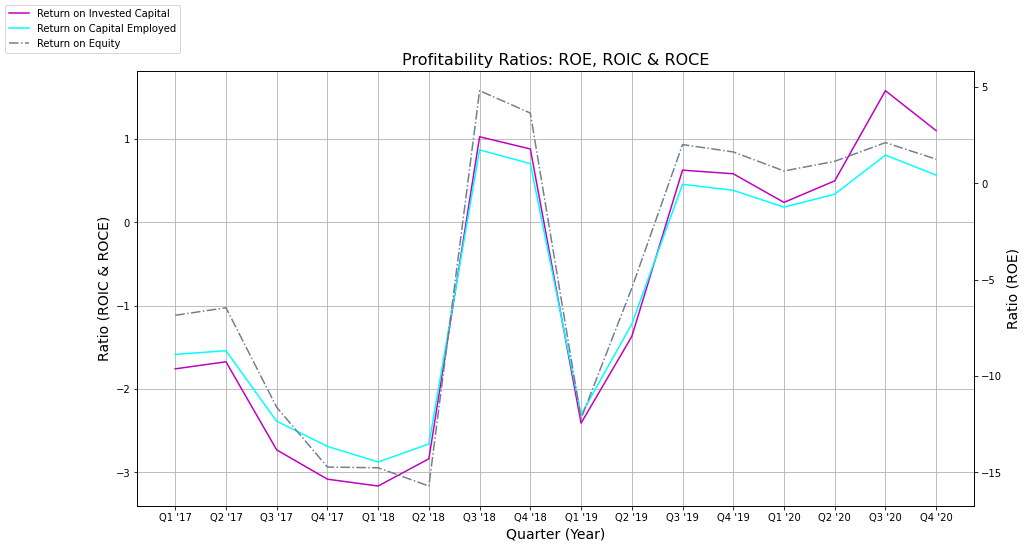

In [8]:
# Plotting return ratios
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, financial_ratio["Return on Invested Capital"], color="m", label="Return on Invested Capital")
ax.plot(financial_ratio.index.values, financial_ratio["Return on Capital Employed"], color="aqua", label="Return on Capital Employed")

ax2 = ax.twinx()
ax2.plot(financial_ratio.index.values, ROE, color="slategrey", linestyle="-.", label="Return on Equity")


# Format the plot
plt.title("Profitability Ratios: ROE, ROIC & ROCE", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Ratio (ROIC & ROCE)", fontsize=14)
ax2.set_ylabel("Ratio (ROE)", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

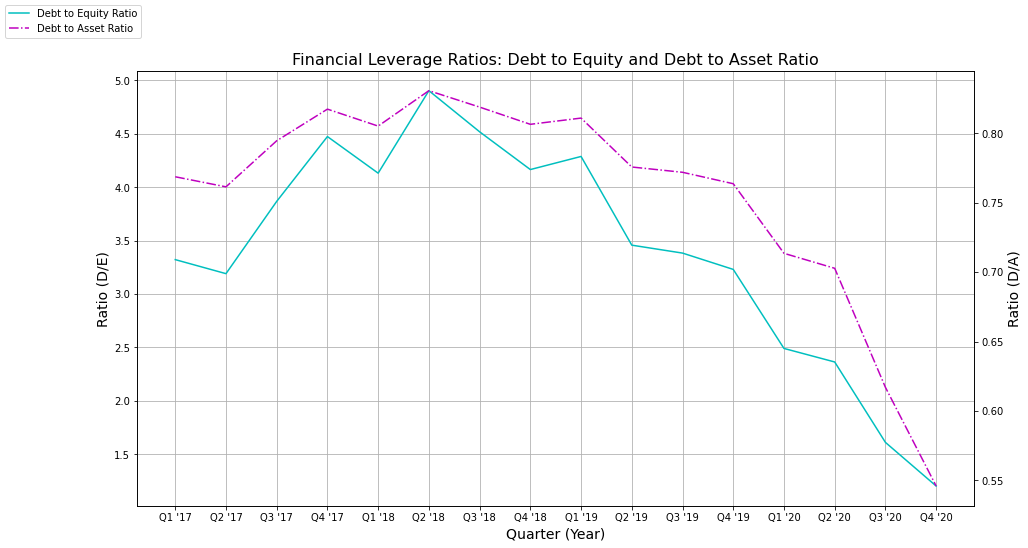

In [9]:
# Plotting financial leverage ratios on the same plot
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, debt_equity, color="c", label="Debt to Equity Ratio")

ax2 = ax.twinx()
ax2.plot(financial_ratio.index.values, debt_asset, color="m", linestyle="-.", label="Debt to Asset Ratio")

# Format the plot
plt.title("Financial Leverage Ratios: Debt to Equity and Debt to Asset Ratio", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Ratio (D/E)", fontsize=14)
ax2.set_ylabel("Ratio (D/A)", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

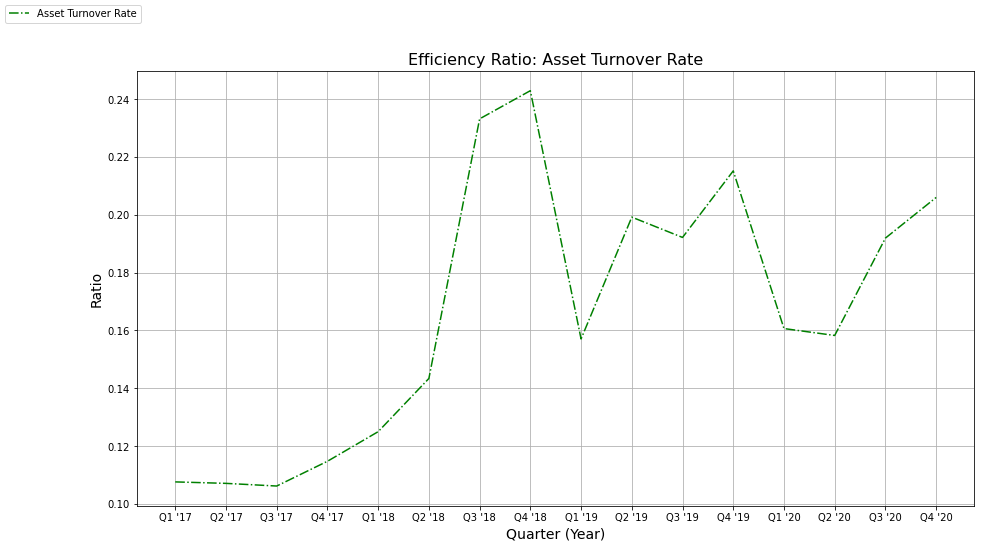

In [10]:
# Plotting asset turnover rate
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, financial_ratio["Asset Turnover Rate"], color="g", linestyle="-.", label="Asset Turnover Rate")

# Format the plot
plt.title("Efficiency Ratio: Asset Turnover Rate", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Ratio", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

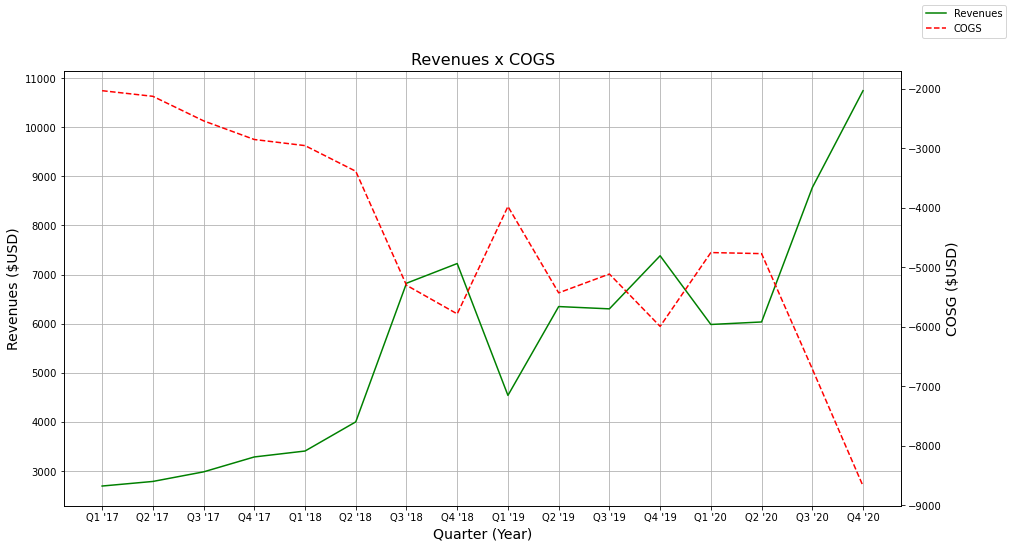

In [11]:
# Plotting revenues against cost of goods sold
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(income_statement.index.values, income_statement["Revenue"], color="g", label="Revenues")
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Revenues ($USD)", fontsize=14)

ax2 = ax.twinx()
ax2.plot(income_statement.index.values, income_statement["Cost of revenue"], color="r", linestyle="--", label="COGS")
ax2.set_ylabel("COSG ($USD)", fontsize=14)

plt.title("Revenues x COGS", fontsize=16)
fig.legend(loc="upper right")
ax.grid()

plt.show()

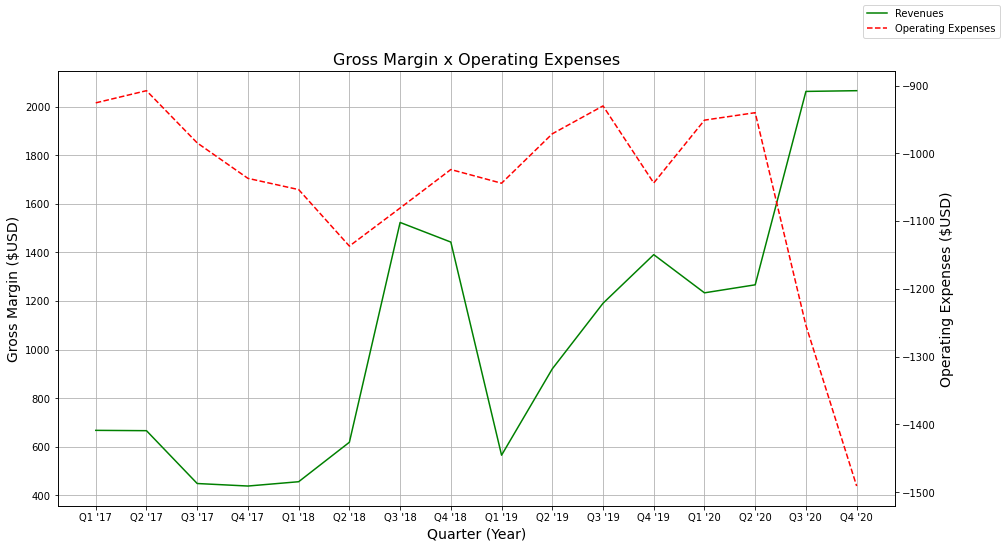

In [12]:
# Plotting the gross margin against operating expenses
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(income_statement.index.values, income_statement["Gross Profit"], color="g", label="Revenues")
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Gross Margin ($USD)", fontsize=14)

ax2 = ax.twinx()
ax2.plot(income_statement.index.values, income_statement.iloc[:, 3], color="r", linestyle="--", label="Operating Expenses")
ax2.set_ylabel("Operating Expenses ($USD)", fontsize=14)

plt.title("Gross Margin x Operating Expenses", fontsize=16)
fig.legend(loc="upper right")
ax.grid()

plt.show()

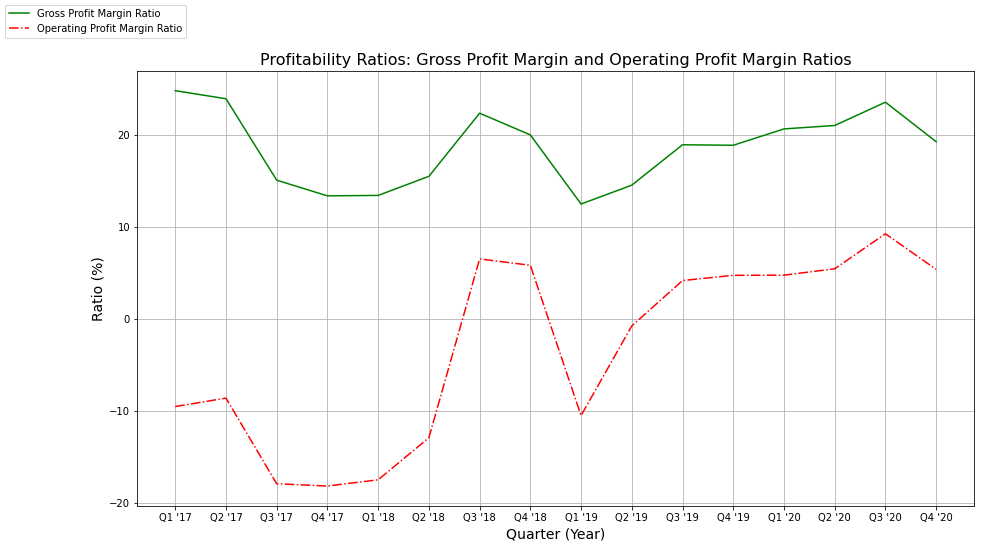

In [13]:
# Plotting profitability ratios on the same plot
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, financial_ratio["Gross Profit Margin Ratio"], color="g", label="Gross Profit Margin Ratio")
ax.plot(financial_ratio.index.values, financial_ratio["Operating Profit Margin Ratio"], color="r", linestyle="-.", label="Operating Profit Margin Ratio")

# Format the plot
plt.title("Profitability Ratios: Gross Profit Margin and Operating Profit Margin Ratios", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Ratio (%)", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

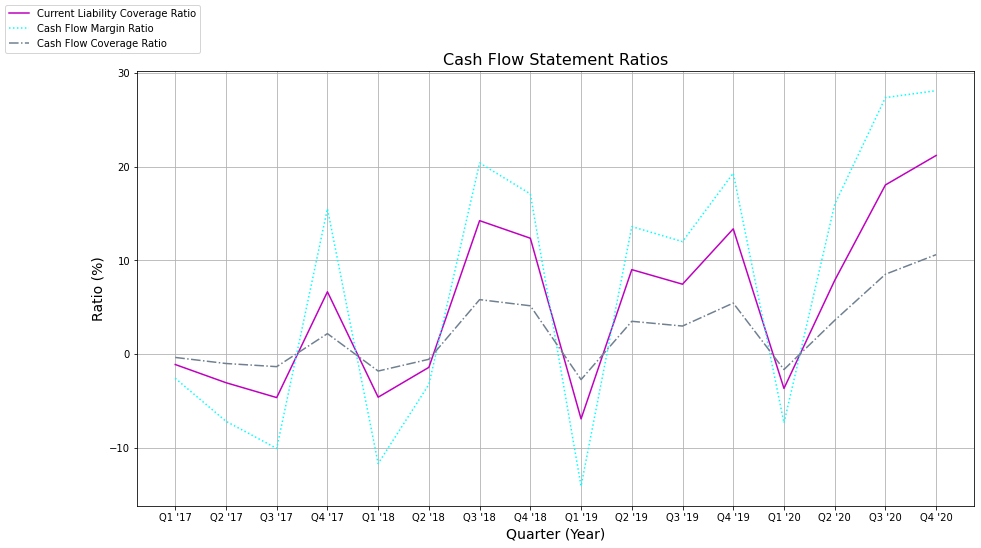

In [14]:
# Plotting cash flow ratios on the same plot
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(financial_ratio.index.values, financial_ratio["Current Liability Coverage Ratio"], color="m", label="Current Liability Coverage Ratio")
ax.plot(financial_ratio.index.values, financial_ratio["Cash Flow Margin Ratio"], color="aqua", linestyle=":", label="Cash Flow Margin Ratio")
ax.plot(financial_ratio.index.values, financial_ratio["Cash Flow Coverage Ratio"], color="slategrey", linestyle="-.", label="Cash Flow Coverage Ratio")

# Format the plot
plt.title("Cash Flow Statement Ratios", fontsize=16)
ax.set_xlabel("Quarter (Year)", fontsize=14)
ax.set_ylabel("Ratio (%)", fontsize=14)
fig.legend(loc="upper left")
ax.grid()

plt.show()

## TESLA STOCK ANALYSIS

### Import Data from Yahoo Finance:

In [15]:
# Import library to grab the daily stock prices for tesla
from pandas_datareader import data as wb 

# Create dataframe with the S&P 500 and Tesla prices
stocks = ["^GSPC", "TSLA"]
df = pd.DataFrame()
start = "2016-1-1"

for i in stocks:
    df[i] = wb.DataReader(i, data_source="yahoo", start=start)["Adj Close"]

### Beta Computation:

In [16]:
# SETUP VARIABLES FOR ANALYSIS:

# Period
period = "2016-1-1 to 2021-03-17"

# Compute log returns for stocks 
log_returns = np.log(df / df.shift(1))

# Compute the annual covariance matrix (assume 252 trading days per annum) 
cov_a = log_returns.cov() * 252

# Compute Tesla's covariance with the market
cov_with_mkt = cov_a.iloc[0,1]

# Compute the annual variance of the market index (^GSPC - S&P 500) 
mkt_var = log_returns["^GSPC"].var() * 252

# Compute Tesla's beta
tesla_beta = cov_with_mkt / mkt_var

# Print statement:
print("="*124)
print("BETA COMPUTATION OUTPUT:")
print("-"*124)
    
if tesla_beta < -1:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to be negatively correlated to the market with great volatility.".format(tesla_beta, period))
elif -1 < tesla_beta < -0.5:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to hold sufficient hedging characteristics against the S&P500.".format(tesla_beta, period))
elif -0.5 <= tesla_beta < -0.025:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to hold potential hedging characteristics against the S&P500.".format(tesla_beta, period))
elif -0.025 <= tesla_beta <= 0.025:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to possess limited, if any, systematic risk, holding limited, if any, correlation to the S&P500.".format(tesla_beta, period))
elif 0.025 < tesla_beta <= 0.5:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to be less volatile than the S&P 500. Potential use case for a defensive play against volatile market movements.".format(tesla_beta, period))
elif 0.5 < tesla_beta <= 1:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to be with the market.".format(tesla_beta, period))
else:
    print("The beta, {:.4}, for the period, {}, suggests Tesla to be more volatile than the market. Appropriate risk management should be exercised.".format(tesla_beta, period))

print("-"*124)

BETA COMPUTATION OUTPUT:
----------------------------------------------------------------------------------------------------------------------------
The beta, 1.329, for the period, 2016-1-1 to 2021-03-17, suggests Tesla to be more volatile than the market. Appropriate risk management should be exercised.
----------------------------------------------------------------------------------------------------------------------------


### Correlation Analysis:

In [17]:
# Import all stocks in the S&P 500 to notebook
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2021,3,17)
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [18]:
# Run a correlation matrix of all the stocks in the S&P 500
corr = data.corr()

In [19]:
# Import Library to create heatmap
import seaborn as sns

# Generate a heatmap to visualize the correlation between equities in the S&P 500

# plt.subplots(figsize=(15,10))
# heatmap = sns.heatmap(corr, 
#                       xticklabels=corr.columns, 
#                       yticklabels=corr.columns, 
#                       cmap=sns.diverging_palette(20, 220, n=200),
#                       annot=True,
#                       square=True)

# plt.show() <- large amount of data, cannot render on local machine

### Monte Carlo Simulation - Forecasting Tesla Stock Price:

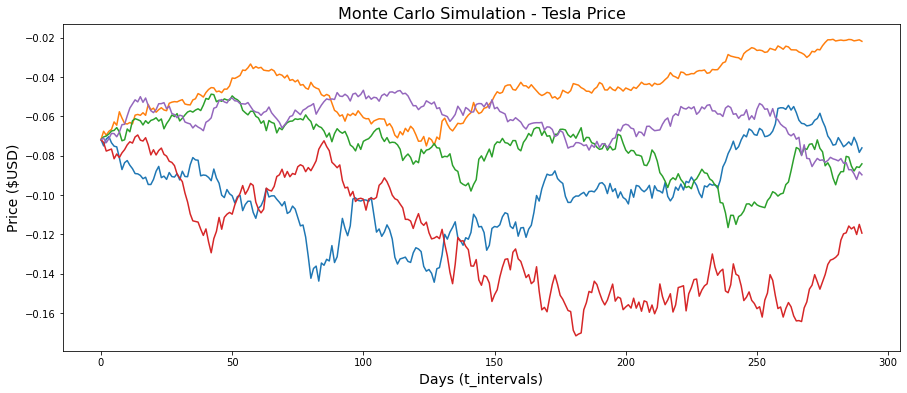

In [36]:
# MONTE CARLO SIMULATION FOR 1 YEAR DATA

# Import normal distribution from scipy.stats library
from scipy.stats import norm

# Compute the mean (u) and variance (var) of the daily returns 

tesla_u = log_returns["TSLA"].mean()
tesla_var = log_returns["TSLA"].var()

# Compute the drift component of Brownian Motion
drift = tesla_u - (0.5 * tesla_var)

# Compute standard deviations of the daily returns
tesla_stdev = log_returns["TSLA"].std()

# Convert drift and standard deviations into numpy arrays
np.array(drift)
np.array(tesla_stdev)

# Random variable for Brownian Motion
t_intervals = 291 # number of days forecasted price for
iterations = 5 # number of simulations

Z = norm.ppf(np.random.rand(t_intervals, iterations))

# Compute daily returns 
daily_returns = np.exp(drift + tesla_stdev * Z)

# Initialize today's price used to forecast future prices
S0 = log_returns["TSLA"].iloc[-1]

# Create price list and indent today's price as the first data point in list
price_list = np.zeros_like(daily_returns)

price_list[0] = S0

# Monte Carlo Simulation
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]
    
# Plot Monte Carlo Simulation
plt.figure(figsize=(15,6))
plt.plot(price_list)
plt.title("Monte Carlo Simulation - Tesla Price", fontsize=16)
plt.xlabel("Days (t_intervals)", fontsize=14)
plt.ylabel("Price ($USD)", fontsize=14)

plt.show()